In [1]:
import pandas as pd
import sys
import matplotlib
import matplotlib.pyplot as plt

In [2]:
print('Python version', sys.version.split()[0])
print('Pandas version', pd.__version__)
print('Matplotlib version', matplotlib.__version__)

Python version 3.11.5
Pandas version 2.2.2
Matplotlib version 3.9.0


In [3]:
P = 46%12+1
strP = f'{P:02d}'

In [4]:
data = pd.read_csv('weather.csv', encoding='utf-8')
data['хмарність'] = data['хмарність'].str.rstrip('%').astype(float)
data['опади'] = data['опади'].replace({' м.м.': '', '-': float('nan')}, regex=True).astype(float)
data['денна температура повітря'] = data['денна температура повітря'].str.rstrip('°C').astype(float)
data['нічна температура повітря'] = data['нічна температура повітря'].str.rstrip('°C').astype(float)
data['сила вітру'] = data['сила вітру'].str.rstrip('м/с').astype(float)

data['місяць'] = data['період'].str.slice(5, 7)
fdata = data[data['місяць'] == strP]

1.

Text(0, 0.5, 'Сила вітру (м/с)')

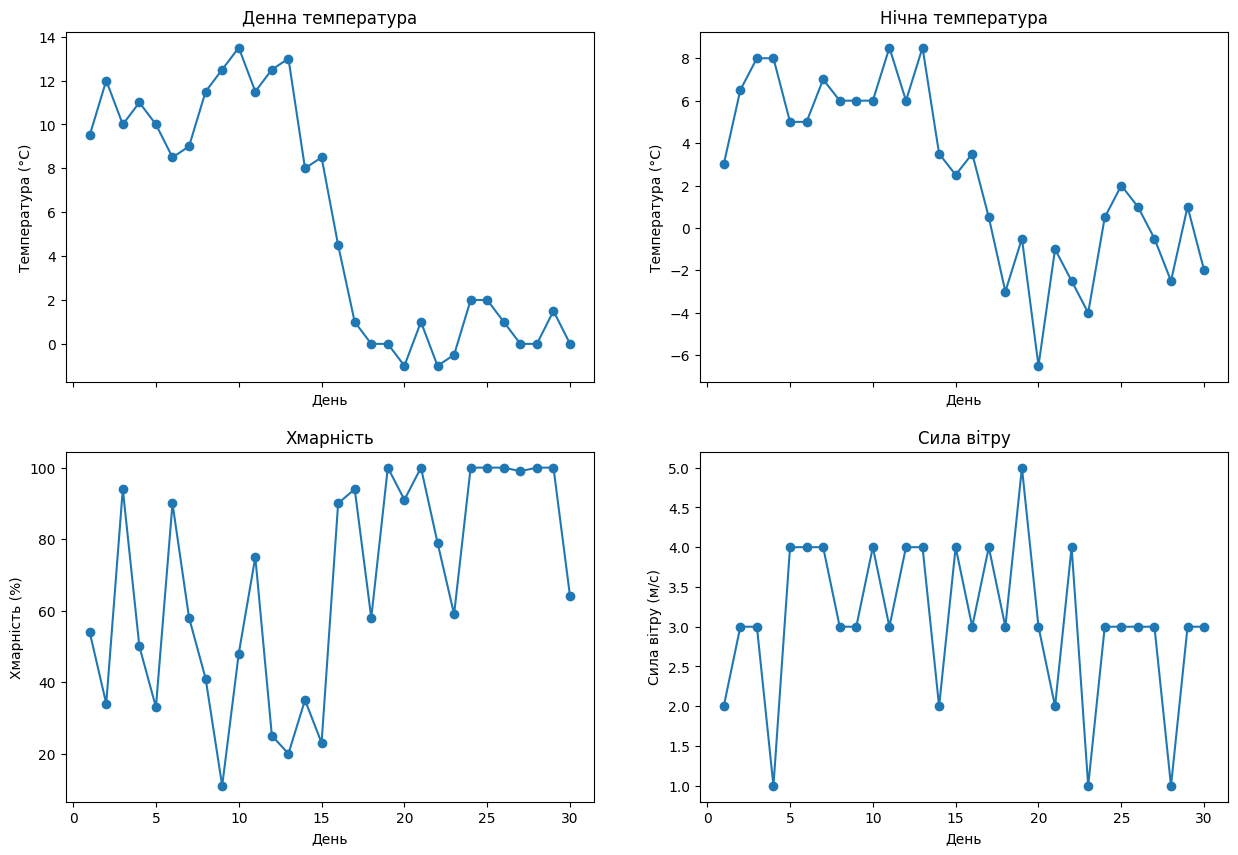

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

axs[0, 0].plot(fdata['день'], fdata['денна температура повітря'], marker='o', linestyle='-')
axs[0, 0].set_title('Денна температура')
axs[0, 0].set_xlabel('День')
axs[0, 0].set_ylabel('Температура (°C)')

axs[0, 1].plot(fdata['день'], fdata['нічна температура повітря'], marker='o', linestyle='-')
axs[0, 1].set_title('Нічна температура')
axs[0, 1].set_xlabel('День')
axs[0, 1].set_ylabel('Температура (°C)')

axs[1, 0].plot(fdata['день'], fdata['хмарність'], marker='o', linestyle='-')
axs[1, 0].set_title('Хмарність')
axs[1, 0].set_xlabel('День')
axs[1, 0].set_ylabel('Хмарність (%)')

axs[1, 1].plot(fdata['день'], fdata['сила вітру'], marker='o', linestyle='-')
axs[1, 1].set_title('Сила вітру')
axs[1, 1].set_xlabel('День')
axs[1, 1].set_ylabel('Сила вітру (м/с)')

2.


Text(0.5, 1.0, 'Бульбашковий графік')

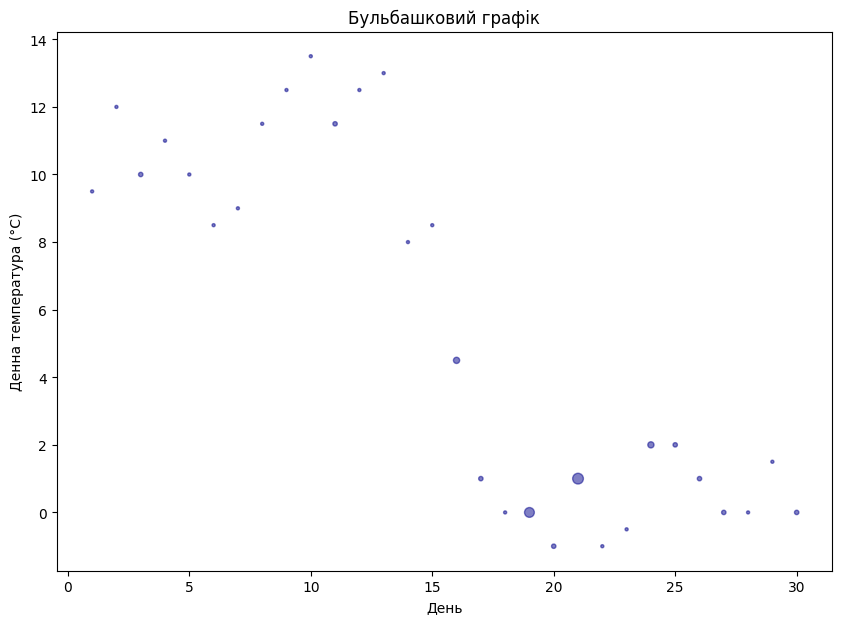

In [6]:
fdata.loc[:, 'опади'] = fdata['опади'].fillna(0.5) #щоб зробити зміни безпосередньо на оригінальному DataFrame, а не на копії
plt.figure(figsize=(10, 7))
plt.scatter(x = fdata['день'], y = fdata['денна температура повітря'], s = fdata['опади']*10 , c='darkblue', alpha=0.5)
plt.xlabel('День')
plt.ylabel('Денна температура (°C)')
plt.title('Бульбашковий графік')

3.

In [7]:
data['відхилення'] = data['денна температура повітря'] - data['нічна температура повітря']
data.groupby('період')['відхилення'].mean()

період
2022-05    7.451613
2022-06    8.316667
2022-07    8.661290
2022-08    9.403226
2022-09    5.416667
2022-10    5.048387
2022-11    3.200000
2022-12    2.596774
2023-01    2.467742
2023-02    3.089286
2023-03    4.693548
2023-04    4.350000
Name: відхилення, dtype: float64

4.

In [8]:
mdev = data['відхилення'].max() #max deviation
data[data['відхилення'] == mdev]

,день,хмарність,опади,денна температура повітря,нічна температура повітря,сила вітру,період,місяць,відхилення
267,26,9.0,NaN,36.5,20.5,4.0,2022-08,08,16.0


5.

In [9]:
fdata.nlargest(4, 'сила вітру')

,день,хмарність,опади,денна температура повітря,нічна температура повітря,сила вітру,період,місяць
169,19,100.0,5.0,0.0,-0.5,5.0,2022-11,11
155,5,33.0,0.5,10.0,5.0,4.0,2022-11,11
156,6,90.0,0.5,8.5,5.0,4.0,2022-11,11
157,7,58.0,0.5,9.0,7.0,4.0,2022-11,11


6.

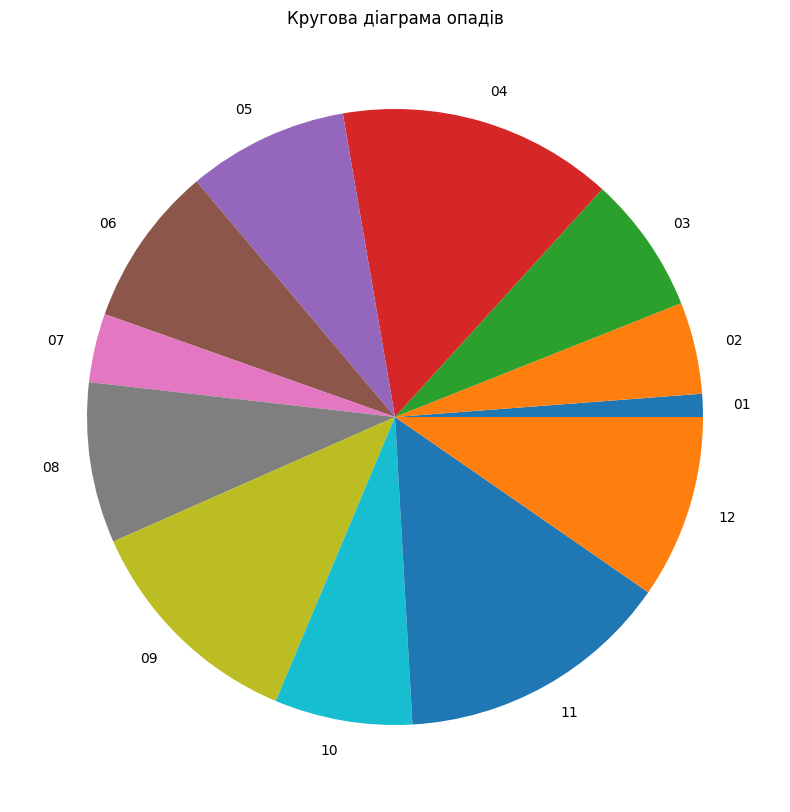

In [10]:
data['опади'] = data['опади'] > 0
rainy_days = data[data['опади']].groupby('місяць').size()

labels = rainy_days.index
count = rainy_days.values

plt.figure(figsize=(10, 10))
plt.pie(count, labels=labels)
plt.title('Кругова діаграма опадів')
plt.show()

7.

C:\Users\Liza\AppData\Local\Temp\ipykernel_12548\2568321004.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_per_month = data.groupby(['період', 'тип']).size().unstack(fill_value=0)


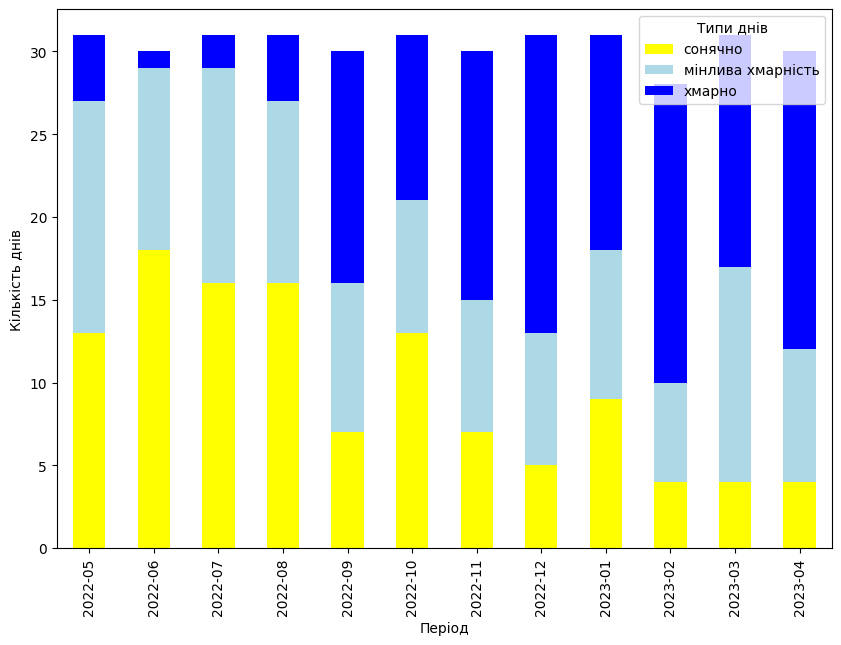

In [11]:
bins = [-1, 35, 70, 101]
labels = ['сонячно', 'мінлива хмарність', 'хмарно']
data['тип'] = pd.cut(data['хмарність'], bins=bins, labels=labels)
days_per_month = data.groupby(['період', 'тип']).size().unstack(fill_value=0)

colors = ['yellow', 'lightblue', 'blue']
days_per_month.plot(kind='bar', stacked=True, figsize=(10, 7), color = colors)

plt.xlabel('Період')
plt.ylabel('Кількість днів')
plt.legend(title='Типи днів')
plt.show()

8.

In [12]:
sunny_days = data[data['тип'] == 'сонячно'].groupby('місяць').size()

sunny_days = sunny_days.reindex(rainy_days.index, fill_value=0)
rainy_days = rainy_days.reindex(sunny_days.index, fill_value=0)

sunny_days[sunny_days > rainy_days].index


Index(['01', '05', '06', '07', '08', '10'], dtype='object', name='місяць')

9.

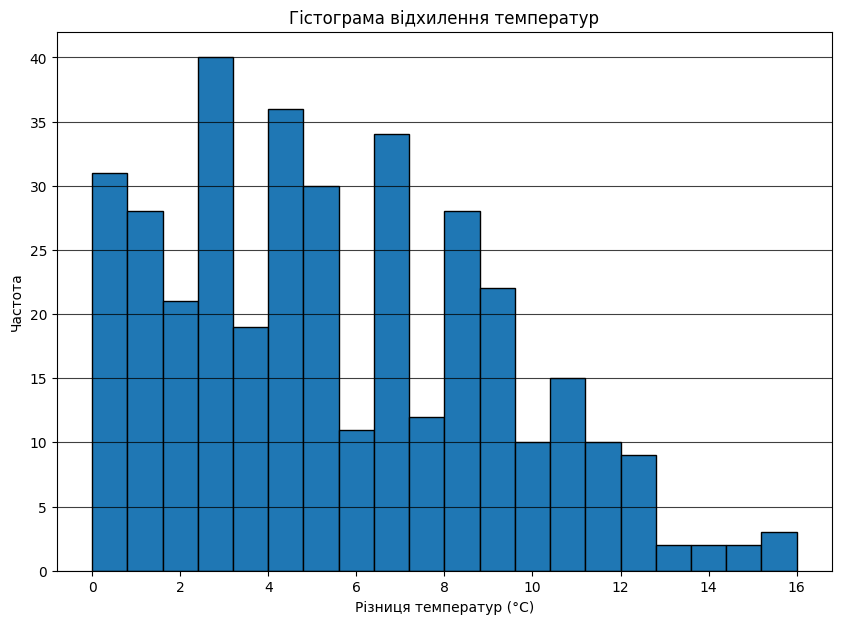

In [13]:
data['різниця температур'] = abs(data['денна температура повітря'] - data['нічна температура повітря'])

plt.figure(figsize=(10, 7))
plt.hist(data['різниця температур'], bins=20, edgecolor='black')
plt.title('Гістограма відхилення температур')
plt.xlabel('Різниця температур (°C)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75, color = 'black')
plt.show()